# Multiple linear regression

- the multiple linear regression looks like: y = b0 + b1*x1 + b2*x2 ....
- In multiple linear regression there is no need feature scaling. 
- Backward elimination is not relevant in python sckitlearn, it will automatically select the relevant features. 
- Assumptions of linear regression : 
    1) linearity
    2) Homoscedasticity
    3) Multivariate (normality of error distribution)
    4) Independence
    5) Lack of multicollinearity (predictors are not correlated with each otehr)
    6) The outlier check: depending on the data include or exclude the outliers. 


In [37]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [38]:
# Import the dataset
math = pd.read_csv("./student-mat.csv", sep=';', header=0)
por = pd.read_csv("./student-por.csv", sep=';', header=0)

# Feature Selection

In [39]:
# separate the numerical and the categorical features
# Specify the target column
target_column = 'G3'  # Replace with your actual target column name

# Separate numerical and categorical columns
numerical_features = math.select_dtypes(include=['number']).columns
categorical_features = math.select_dtypes(include=['object', 'category']).columns

# Correlation results dictionary
correlation_results = {}

# Handle numerical columns
for col in numerical_features:
    if col != target_column:
        correlation, _ = pearsonr(math[col], math[target_column])
        correlation_results[col] = abs(correlation)

# Handle categorical columns
for col in categorical_features:
    if col != target_column:
        # Encode categorical values
        encoded_col = LabelEncoder().fit_transform(math[col])
        
        if math[target_column].dtype in ['object', 'category']:
            # Both target and column are categorical
            target_encoded = LabelEncoder().fit_transform(df[target_column])
            mutual_info = mutual_info_classif(
                math[[col]], target_encoded, discrete_features=True
            )[0]
            correlation_results[col] = mutual_info
        else:
            # Column is categorical, target is numerical
            correlation, _ = pointbiserialr(encoded_col, math[target_column])
            correlation_results[col] = abs(correlation)

# Sort features by correlation
sorted_features = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Display top features
print("Feature Correlations with Target Variable:")
for feature, correlation in sorted_features:
    print(f"{feature}: {correlation:.1f}")


Feature Correlations with Target Variable:
G2: 0.9
G1: 0.8
failures: 0.4
Medu: 0.2
higher: 0.2
age: 0.2
Fedu: 0.2
goout: 0.1
romantic: 0.1
reason: 0.1
traveltime: 0.1
address: 0.1
sex: 0.1
Mjob: 0.1
paid: 0.1
internet: 0.1
studytime: 0.1
schoolsup: 0.1
famsize: 0.1
guardian: 0.1
health: 0.1
Pstatus: 0.1
Dalc: 0.1
Walc: 0.1
nursery: 0.1
famrel: 0.1
school: 0.0
Fjob: 0.0
famsup: 0.0
absences: 0.0
activities: 0.0
freetime: 0.0


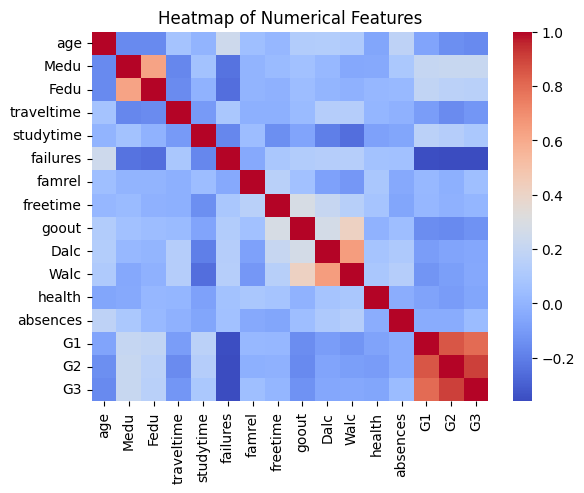

In [40]:
#correlation methods for mixed data

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for numerical features
numerical_corr = math[numerical_features].corr()
sns.heatmap(numerical_corr, annot=False, cmap='coolwarm')
plt.title("Heatmap of Numerical Features")
plt.show()



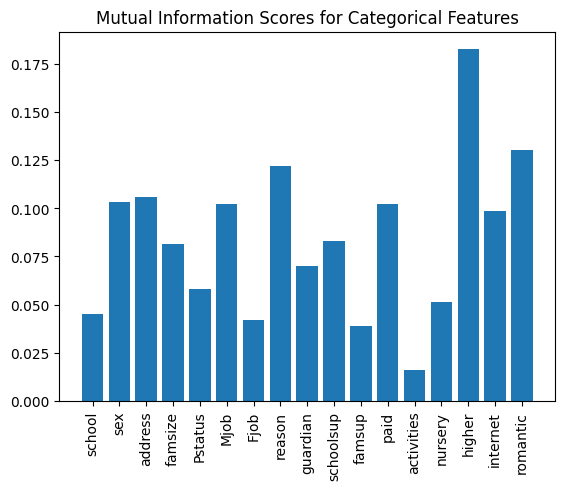

In [33]:
import matplotlib.pyplot as plt

# Bar plot for mutual information scores
categorical_corr = {k: v for k, v in correlation_results.items() if k in categorical_features}
plt.bar(categorical_corr.keys(), categorical_corr.values())
plt.xticks(rotation=90)
plt.title("Mutual Information Scores for Categorical Features")
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (if any)
df_encoded = math.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose classifier or regressor based on your target
model = RandomForestClassifier(random_state=42) if y.dtype == 'object' else RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from Random Forest:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


Feature Importance from Random Forest:
G2: 0.7925
absences: 0.1103
age: 0.0152
reason: 0.0103
G1: 0.0076
famrel: 0.0064
Mjob: 0.0061
romantic: 0.0057
health: 0.0047
activities: 0.0045
guardian: 0.0044
goout: 0.0041
Fedu: 0.0031
Fjob: 0.0028
studytime: 0.0026
freetime: 0.0025
Walc: 0.0022
schoolsup: 0.0021
Medu: 0.0021
failures: 0.0016
Dalc: 0.0012
sex: 0.0011
famsize: 0.0011
traveltime: 0.0011
internet: 0.0011
paid: 0.0009
famsup: 0.0007
nursery: 0.0007
address: 0.0005
higher: 0.0004
school: 0.0003
Pstatus: 0.0002


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical columns (if any)
df_encoded = math.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)

# Get coefficients (absolute value as importance)
importances = abs(model.coef_[0])

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from Logistic Regression:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


Feature Importance from Logistic Regression:
G2: 3.4115
absences: 2.2994
G1: 1.3354
age: 1.0115
schoolsup: 0.8230
romantic: 0.7355
failures: 0.5414
activities: 0.4401
famrel: 0.4332
goout: 0.3809
Fedu: 0.3774
Pstatus: 0.3762
health: 0.3289
Medu: 0.2687
nursery: 0.2630
guardian: 0.2605
school: 0.2138
Dalc: 0.2059
famsup: 0.1967
Fjob: 0.1752
paid: 0.1681
freetime: 0.1547
traveltime: 0.1263
Mjob: 0.1141
reason: 0.1048
studytime: 0.1039
Walc: 0.0728
higher: 0.0634
sex: 0.0614
internet: 0.0446
address: 0.0354
famsize: 0.0109


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (if any)
df_encoded = math.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier(random_state=42) if y.dtype == 'object' else xgb.XGBRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from XGBoost:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/cholponzhakshylykova/Desktop/SDS/SDS-CP015-student-performance-pred/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Users/cholponzhakshylykova/Desktop/SDS/SDS-CP015-student-performance-pred/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


In [33]:
#change the data types: obejct -> category

#check the data types
print(math.info())
print(por.info())

#change the data types:
# Check data types before conversion
print("Before conversion:\n", math.dtypes)

# Convert 'object' columns to 'category'
for col in math.columns:
    if math[col].dtypes == 'object':
        math[col] = math[col].astype('category')

# Check data types after conversion
print("After conversion:\n", math.dtypes)


# Check data types before conversion
print("Before conversion:\n", por.dtypes)

# Convert 'object' columns to 'category'
for col in por.columns:
    if por[col].dtypes == 'object':
        por[col] = por[col].astype('category')

# Check data types after conversion
print("After conversion:\n", por.dtypes)

#convert additionally this columns into a category


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [34]:
X = math.iloc[:, :-1].values #all the rows, all the columns except the last one
y = math.iloc[:, -1].values  #all the rows, only the last column

In [5]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [6]:
# encode the categorical variables 

from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train and X_test are NumPy arrays
# Identify categorical columns (columns with string data)
categorical_columns = [i for i in range(X_train.shape[1]) if isinstance(X_train[0, i], str)]

# Create a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Apply label encoding to categorical columns in X_train
for i in categorical_columns:
    le = LabelEncoder()
    X_train[:, i] = le.fit_transform(X_train[:, i])
    label_encoders[i] = le  # Save the LabelEncoder for this column

# Apply the same encoders to categorical columns in X_test
for i in categorical_columns:
    if i in label_encoders:
        le = label_encoders[i]
        X_test[:, i] = le.transform(X_test[:, i])  # Transform using the same encoder

In [7]:
# training the multiple linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #trainig of the model.

#the class of sklearn will automatically choose the best model. 

#since we have many variables we can not plot them. like depenant (x) , independent (y) values. Instead we will just display it
#as a table. 

LinearRegression()

In [8]:
# predict the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # display only 2 decimals after the column for the numerical values. 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 
#concatenate two vectors vertically.
#y_pred.reshape(len(y_pred),1) it will reshape the vertically: row = length of the y_pred, column = 1
#theh last 1 refers two the horizontal concatenation.

[[ 5.42  0.  ]
 [11.1  10.  ]
 [ 4.92  8.  ]
 [ 8.55 10.  ]
 [ 9.88 10.  ]
 [10.48 12.  ]
 [ 6.57  8.  ]
 [12.7  11.  ]
 [10.59 11.  ]
 [ 7.18  8.  ]
 [12.19 11.  ]
 [13.75 13.  ]
 [ 5.96  8.  ]
 [ 8.7   7.  ]
 [ 7.93 10.  ]
 [11.28 10.  ]
 [16.31 15.  ]
 [16.59 16.  ]
 [ 6.07  8.  ]
 [ 8.9  10.  ]
 [10.53 11.  ]
 [18.15 19.  ]
 [ 9.74 10.  ]
 [11.78 11.  ]
 [15.41 16.  ]
 [ 5.56  5.  ]
 [12.13 11.  ]
 [ 7.05  9.  ]
 [ 9.3  10.  ]
 [12.31 13.  ]
 [11.35 12.  ]
 [12.19 11.  ]
 [ 5.35 10.  ]
 [10.38 11.  ]
 [12.55 14.  ]
 [ 8.79  8.  ]
 [10.62 10.  ]
 [ 7.9  10.  ]
 [ 7.52  7.  ]
 [10.65 10.  ]
 [ 9.47  9.  ]
 [11.09  9.  ]
 [16.19 15.  ]
 [ 4.87  9.  ]
 [10.1  11.  ]
 [11.87 13.  ]
 [19.16 18.  ]
 [ 8.67  9.  ]
 [13.06 14.  ]
 [ 8.13 10.  ]
 [ 4.93  5.  ]
 [12.48 10.  ]
 [ 9.47 11.  ]
 [ 5.3   6.  ]
 [ 7.22  6.  ]
 [10.91 11.  ]
 [ 6.53  6.  ]
 [15.48 15.  ]
 [ 9.54 10.  ]
 [ 3.47  0.  ]
 [ 5.57  0.  ]
 [ 8.    0.  ]
 [10.37 13.  ]
 [15.07 17.  ]
 [14.09 13.  ]
 [ 9.32  8.  ]
 [10.35 10

In [10]:
#getting the regression coefficients: 

print(regressor.coef_)
print(regressor.intercept_)

[ 7.13e-01  1.32e-01 -3.19e-01 -1.66e-01  1.61e-01 -8.86e-02  1.70e-01
 -7.12e-02 -4.75e-02 -4.85e-02  7.23e-02  6.42e-02  6.85e-02 -7.83e-02
 -1.09e-01  3.97e-02  1.31e-02 -4.45e-04 -4.62e-01 -2.89e-01  1.01e+00
 -1.95e-01 -2.46e-01  3.76e-01  8.31e-02  1.63e-01 -1.61e-01  7.38e-02
  1.24e-01  4.46e-02  1.68e-01  9.60e-01]
0.3682319712749962


In [12]:
# Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)




0.736627349028625

- the model performed okayish with r2 value of 0.73 for the math class